## Importing the required libraries

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime

In [3]:
import pearsonr as pearsonr
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
#from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

## Scrapping data from Yahoo ( 1 July 2002  to  27 Oct 2022)

In [5]:
AXIS = pdr.get_data_yahoo('AXISBANK.NS',
                         start = datetime.datetime(2002, 7, 1),
                         end=datetime.datetime(2022, 11, 21))

In [6]:
print(AXIS)

                  High         Low        Open       Close     Volume  \
Date                                                                    
2002-07-01    7.970000    7.610000    7.610000    7.680000   290210.0   
2002-07-02    7.880000    7.600000    7.880000    7.650000   226820.0   
2002-07-03    7.820000    7.700000    7.800000    7.770000   149540.0   
2002-07-04    7.880000    7.720000    7.800000    7.750000   182560.0   
2002-07-05    8.020000    7.740000    8.020000    7.760000   359170.0   
...                ...         ...         ...         ...        ...   
2022-11-15  859.849976  847.200012  851.250000  858.650024  7124767.0   
2022-11-16  861.599976  850.599976  858.000000  855.400024  6521854.0   
2022-11-17  861.400024  852.700012  855.400024  858.200012  4909607.0   
2022-11-18  865.799988  855.000000  859.299988  859.200012  7065304.0   
2022-11-21  870.950012  859.000000  860.000000  870.049988  7209207.0   

             Adj Close  
Date                    


In [7]:
HDFC = pdr.get_data_yahoo('HDFCBANK.NS',
                         start = datetime.datetime(2002, 7, 1),
                         end=datetime.datetime(2022, 11, 21))

In [8]:
print(HDFC)

                   High          Low         Open        Close     Volume  \
Date                                                                        
2002-07-01    21.340000    20.000000    20.000000    21.180000  1737470.0   
2002-07-02    21.299999    20.815001    21.299999    20.965000   911400.0   
2002-07-03    21.000000    20.799999    21.000000    20.985001   382260.0   
2002-07-04    21.844999    20.834999    21.030001    21.735001  1154400.0   
2002-07-05    21.844999    21.100000    21.844999    21.340000   466380.0   
...                 ...          ...          ...          ...        ...   
2022-11-15  1623.150024  1605.250000  1623.150024  1619.000000  5515101.0   
2022-11-16  1642.000000  1612.000000  1618.650024  1632.900024  6789075.0   
2022-11-17  1631.550049  1613.900024  1618.099976  1618.150024  6050465.0   
2022-11-18  1623.000000  1605.250000  1621.000000  1613.900024  5229616.0   
2022-11-21  1612.000000  1590.199951  1607.650024  1597.349976  4172408.0   

In [9]:
ICICI = pdr.get_data_yahoo('ICICIBANK.NS',
                         start = datetime.datetime(2002, 7, 1),
                         end=datetime.datetime(2022, 11, 21))

In [10]:
print(ICICI)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2002-07-01   25.818180   24.818180   25.418180   25.127272   2047540.0   
2002-07-02   27.636362   25.236362   25.454544   26.745455   5546354.0   
2002-07-03   28.181818   26.645454   26.727272   28.090908   5745267.0   
2002-07-04   28.799999   27.036364   28.181818   27.390909   3896601.0   
2002-07-05   27.863636   26.945454   27.090908   27.672728   3261038.0   
...                ...         ...         ...         ...         ...   
2022-11-15  913.650024  898.799988  900.549988  911.700012  15176911.0   
2022-11-16  918.099976  908.099976  912.549988  913.599976  13008311.0   
2022-11-17  922.299988  910.349976  913.000000  919.799988  12584194.0   
2022-11-18  922.000000  910.549988  919.799988  920.349976  10874061.0   
2022-11-21  924.799988  914.049988  914.049988  921.400024   9245704.0   

             Adj Close  
Date        

In [11]:
INDUS = pdr.get_data_yahoo('INDUSINDBK.NS',
                         start = datetime.datetime(2002, 7, 1),
                         end=datetime.datetime(2022, 11, 21))

In [12]:
print(INDUS)

                   High          Low         Open        Close     Volume  \
Date                                                                        
2002-07-01    18.900000    18.299999    18.500000    18.600000    84409.0   
2002-07-02    19.000000    18.500000    18.600000    18.650000    34616.0   
2002-07-03    19.000000    17.650000    18.650000    17.950001    89445.0   
2002-07-04    18.350000    17.900000    18.250000    18.000000    58765.0   
2002-07-05    18.200001    17.650000    17.850000    18.100000    30847.0   
...                 ...          ...          ...          ...        ...   
2022-11-15  1167.750000  1147.150024  1157.849976  1152.849976  1802234.0   
2022-11-16  1158.000000  1136.000000  1151.000000  1144.099976  2331206.0   
2022-11-17  1152.750000  1137.550049  1141.449951  1146.500000  1721557.0   
2022-11-18  1151.349976  1122.000000  1151.349976  1128.650024  2082130.0   
2022-11-21  1142.050049  1117.000000  1119.550049  1139.000000  2602264.0   

In [13]:
stocks = yf.download(tickers=['AXISBANK.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS'], start = datetime.datetime(2002, 7, 1),
                     end=datetime.datetime(2022, 11, 21))

[*********************100%***********************]  4 of 4 completed


In [14]:
print(stocks)

             Adj Close                                               Close  \
           AXISBANK.NS  HDFCBANK.NS ICICIBANK.NS INDUSINDBK.NS AXISBANK.NS   
Date                                                                         
2002-07-01    6.232168    18.305023    18.183350     13.616018    7.680000   
2002-07-02    6.207823    18.119207    19.354353     13.652623    7.650000   
2002-07-03    6.305201    18.136497    20.327988     13.140192    7.770000   
2002-07-04    6.288970    18.784689    19.821428     13.176793    7.750000   
2002-07-05    6.297087    18.443308    20.025368     13.249999    7.760000   
...                ...          ...          ...           ...         ...   
2022-11-14  851.000000  1615.050049   894.950012   1152.949951  851.000000   
2022-11-15  858.650024  1619.000000   911.700012   1152.849976  858.650024   
2022-11-16  855.400024  1632.900024   913.599976   1144.099976  855.400024   
2022-11-17  858.200012  1618.150024   919.799988   1146.500000  

## Exploratory Data Analysis

# First five values

In [15]:
AXIS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-01,7.97,7.61,7.61,7.68,290210.0,6.232168
2002-07-02,7.88,7.60,7.88,7.65,226820.0,6.207823
2002-07-03,7.82,7.70,7.80,7.77,149540.0,6.305201
2002-07-04,7.88,7.72,7.80,7.75,182560.0,6.288971
2002-07-05,8.02,7.74,8.02,7.76,359170.0,6.297086


In [16]:
HDFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-01,21.340000,20.000000,20.000000,21.180000,1737470.0,18.305027
2002-07-02,21.299999,20.815001,21.299999,20.965000,911400.0,18.119209
2002-07-03,21.000000,20.799999,21.000000,20.985001,382260.0,18.136497
2002-07-04,21.844999,20.834999,21.030001,21.735001,1154400.0,18.784689
2002-07-05,21.844999,21.100000,21.844999,21.340000,466380.0,18.443310


In [17]:
ICICI.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-01,25.818180,24.818180,25.418180,25.127272,2047540.0,18.183353
2002-07-02,27.636362,25.236362,25.454544,26.745455,5546354.0,19.354351
2002-07-03,28.181818,26.645454,26.727272,28.090908,5745267.0,20.327982
2002-07-04,28.799999,27.036364,28.181818,27.390909,3896601.0,19.821436
2002-07-05,27.863636,26.945454,27.090908,27.672728,3261038.0,20.025372


In [18]:
INDUS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-01,18.900000,18.299999,18.50,18.600000,84409.0,13.616019
2002-07-02,19.000000,18.500000,18.60,18.650000,34616.0,13.652622
2002-07-03,19.000000,17.650000,18.65,17.950001,89445.0,13.140193
2002-07-04,18.350000,17.900000,18.25,18.000000,58765.0,13.176793
2002-07-05,18.200001,17.650000,17.85,18.100000,30847.0,13.249998


# Shape

In [19]:
AXIS.shape

(5066, 6)

In [20]:
HDFC.shape

(5069, 6)

In [21]:
ICICI.shape

(5066, 6)

In [22]:
INDUS.shape

(5061, 6)

# Descriptive Analysis

In [23]:
AXIS.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5066.000000,5066.000000,5066.000000,5066.000000,5.066000e+03,5066.000000
mean,328.668546,318.836648,323.997950,323.697772,8.777937e+06,315.364223
std,249.152576,243.474487,246.467293,246.309053,8.988948e+06,248.507536
min,6.970000,6.630000,6.710000,6.820000,0.000000e+00,5.534294
25%,100.032499,94.850002,97.664999,97.612499,3.218180e+06,86.877817
50%,256.789993,249.000000,252.409996,252.714996,6.700560e+06,236.293358
75%,534.937515,519.975006,527.112518,527.225006,1.111580e+07,522.221741
max,919.950012,905.000000,916.000000,915.150024,1.205419e+08,915.150024


In [24]:
HDFC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5069.000000,5069.000000,5069.000000,5069.000000,5.069000e+03,5069.000000
mean,494.610133,484.327377,489.677829,489.611779,6.239600e+06,473.650697
std,481.807579,473.014503,477.569349,477.459846,6.094243e+06,473.799558
min,19.184999,18.600000,18.900000,18.799999,0.000000e+00,16.248089
25%,104.000000,99.599998,101.900002,101.599998,2.732006e+06,91.467728
50%,295.700012,289.299988,293.450012,293.500000,4.771748e+06,273.858795
75%,901.825012,880.549988,890.500000,894.275024,7.630636e+06,868.480835
max,1725.000000,1671.000000,1705.000000,1688.699951,2.011300e+08,1669.291016


In [25]:
ICICI.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5066.000000,5066.000000,5066.000000,5066.000000,5.066000e+03,5066.000000
mean,246.780055,239.815159,243.430015,243.312566,1.930048e+07,227.940700
std,192.169598,188.465039,190.306886,190.379571,1.891857e+07,194.777275
min,21.454544,19.890909,20.272726,20.100000,0.000000e+00,14.545365
25%,121.863638,116.025002,118.354546,118.868183,8.579505e+06,97.322996
50%,195.863632,190.200005,193.027275,192.881821,1.482547e+07,169.440071
75%,302.949997,294.549988,299.272736,298.597733,2.343636e+07,285.326302
max,943.250000,922.950012,942.049988,926.299988,2.868577e+08,926.299988


In [26]:
INDUS.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5061.000000,5061.000000,5061.000000,5061.000000,5.061000e+03,5061.000000
mean,568.986208,552.158595,560.990190,560.396680,2.630511e+06,544.476819
std,567.032185,554.014336,560.930299,560.468936,5.684649e+06,551.001545
min,13.750000,12.750000,12.750000,13.600000,0.000000e+00,10.813531
25%,57.799999,54.650002,56.400002,56.099998,5.260870e+05,50.010582
50%,338.649994,328.350006,333.049988,333.250000,1.028057e+06,316.148071
75%,969.000000,945.950012,958.000000,957.450012,2.324909e+06,936.225830
max,2038.000000,2003.449951,2033.099976,2023.050049,8.133499e+07,1986.526733


# Summary OR Quick Overview

In [27]:
AXIS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5066 entries, 2002-07-01 to 2022-11-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5066 non-null   float64
 1   Low        5066 non-null   float64
 2   Open       5066 non-null   float64
 3   Close      5066 non-null   float64
 4   Volume     5066 non-null   float64
 5   Adj Close  5066 non-null   float64
dtypes: float64(6)
memory usage: 277.0 KB


In [28]:
HDFC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5069 entries, 2002-07-01 to 2022-11-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5069 non-null   float64
 1   Low        5069 non-null   float64
 2   Open       5069 non-null   float64
 3   Close      5069 non-null   float64
 4   Volume     5069 non-null   float64
 5   Adj Close  5069 non-null   float64
dtypes: float64(6)
memory usage: 277.2 KB


In [29]:
ICICI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5066 entries, 2002-07-01 to 2022-11-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5066 non-null   float64
 1   Low        5066 non-null   float64
 2   Open       5066 non-null   float64
 3   Close      5066 non-null   float64
 4   Volume     5066 non-null   float64
 5   Adj Close  5066 non-null   float64
dtypes: float64(6)
memory usage: 277.0 KB


In [30]:
INDUS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5061 entries, 2002-07-01 to 2022-11-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5061 non-null   float64
 1   Low        5061 non-null   float64
 2   Open       5061 non-null   float64
 3   Close      5061 non-null   float64
 4   Volume     5061 non-null   float64
 5   Adj Close  5061 non-null   float64
dtypes: float64(6)
memory usage: 276.8 KB


# Historical view of the closing prices (Adjusted Closing Price against the Stock)

<AxesSubplot: xlabel='Date'>

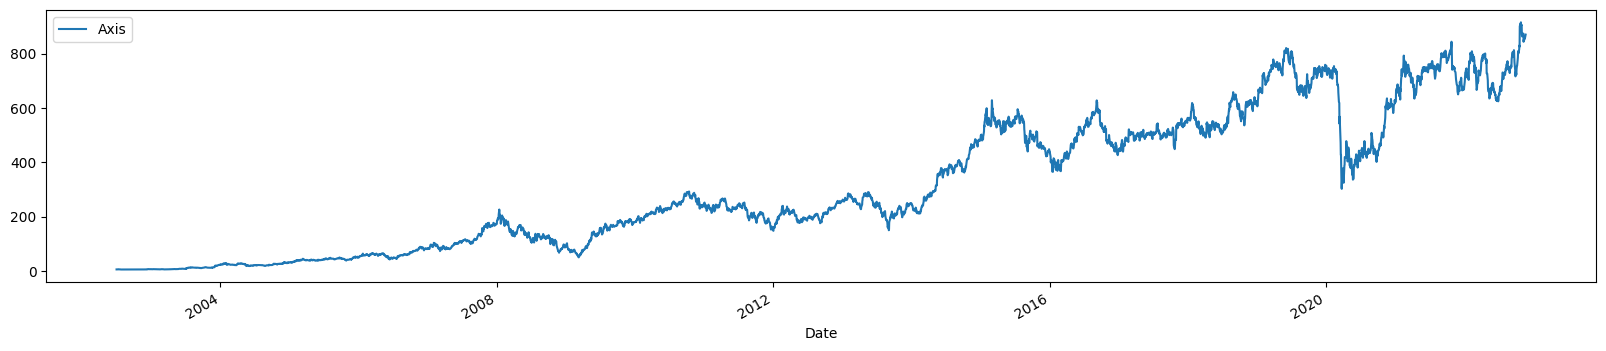

In [31]:
AXIS['Adj Close'].plot(legend=True, figsize=(20,4), label="Axis")        # axis.plot.line(y="Adj Close", use_index=True)

<AxesSubplot: xlabel='Date'>

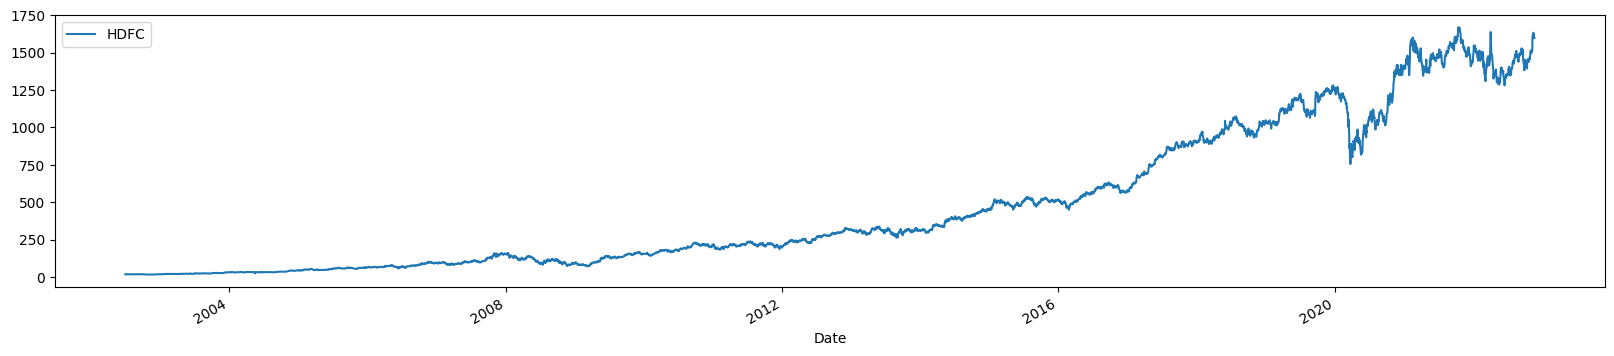

In [32]:
HDFC['Adj Close'].plot(legend=True, figsize=(20,4), label="HDFC")

<AxesSubplot: xlabel='Date'>

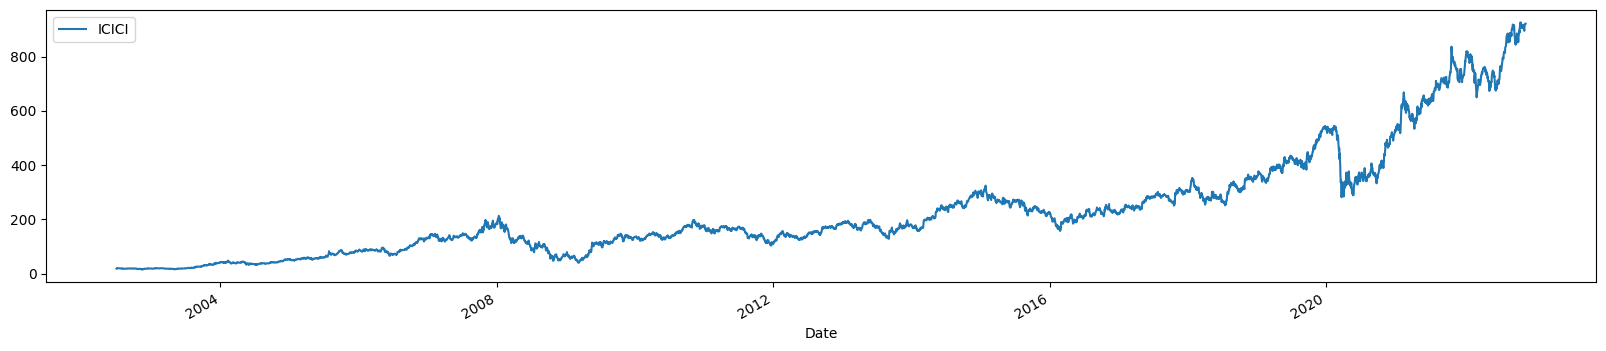

In [33]:
ICICI['Adj Close'].plot(legend=True, figsize=(20,4), label="ICICI")

<AxesSubplot: xlabel='Date'>

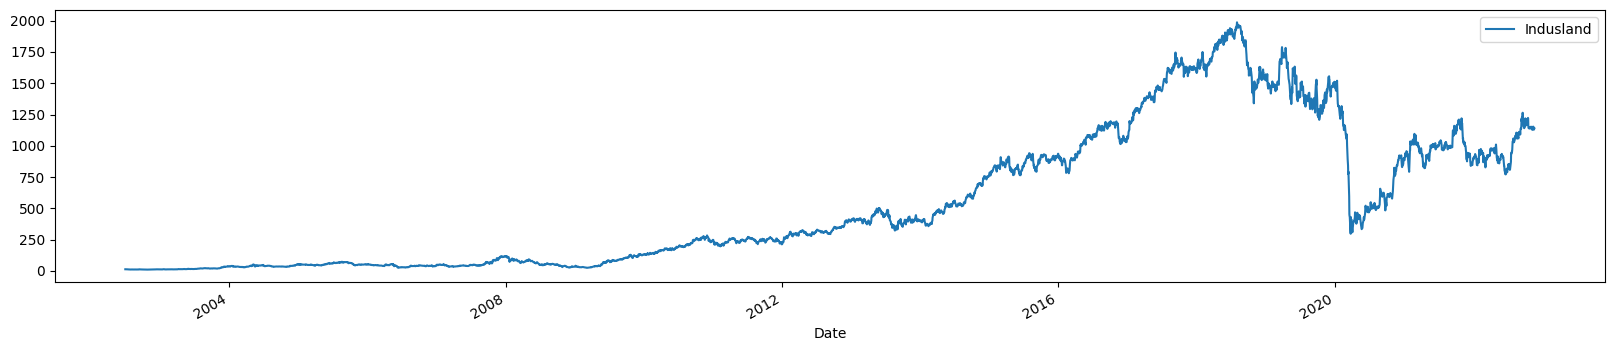

In [34]:
INDUS['Adj Close'].plot(legend=True, figsize=(20,4), label="Indusland")

# The total volume of stocks being traded from 2002 to 2022

<AxesSubplot: xlabel='Date'>

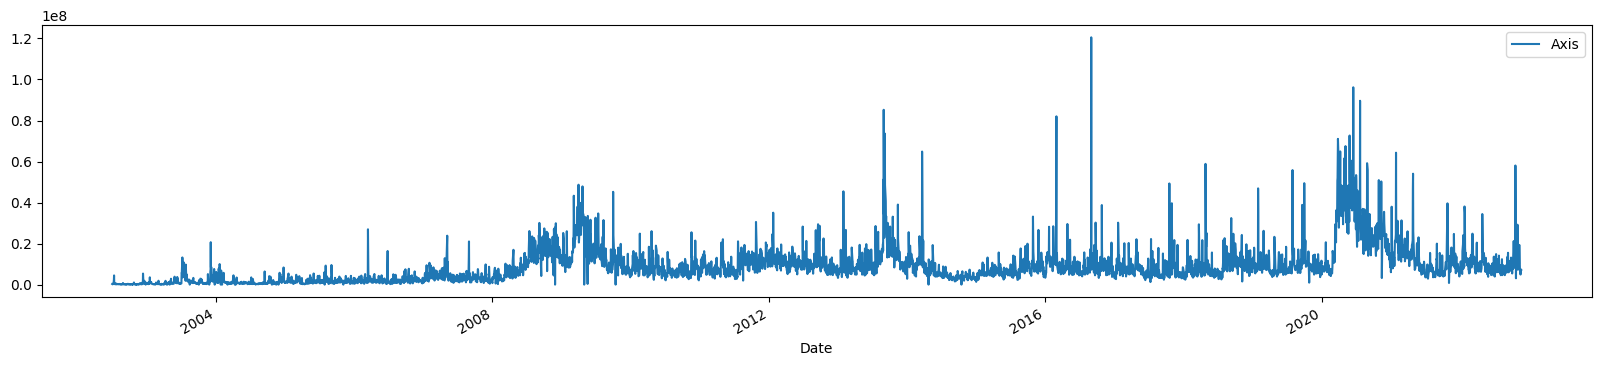

In [35]:
AXIS['Volume'].plot(legend = True, figsize = (20,4), label="Axis")

<AxesSubplot: xlabel='Date'>

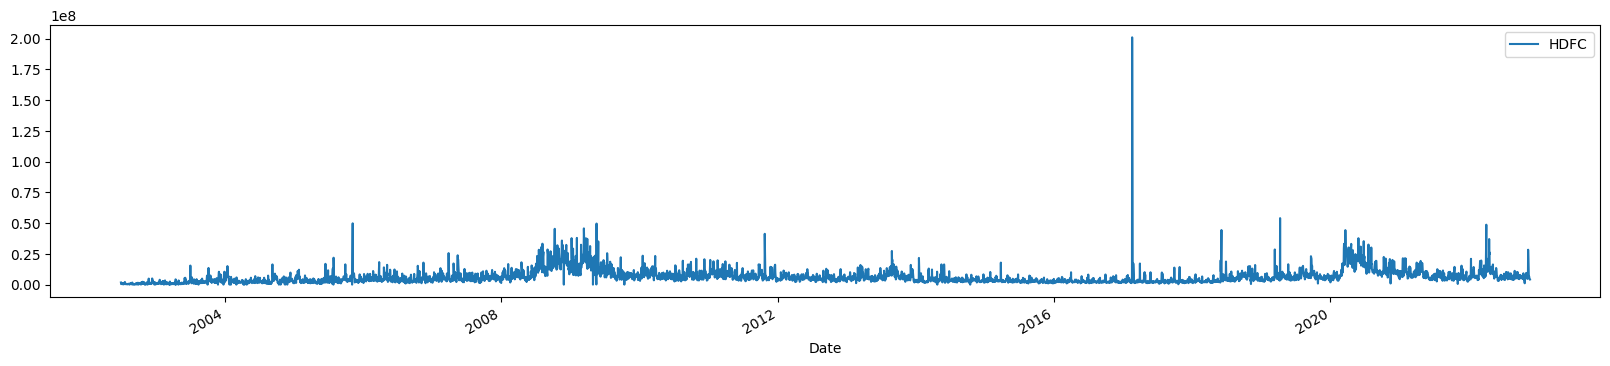

In [36]:
HDFC['Volume'].plot(legend = True, figsize = (20,4), label="HDFC")

<AxesSubplot: xlabel='Date'>

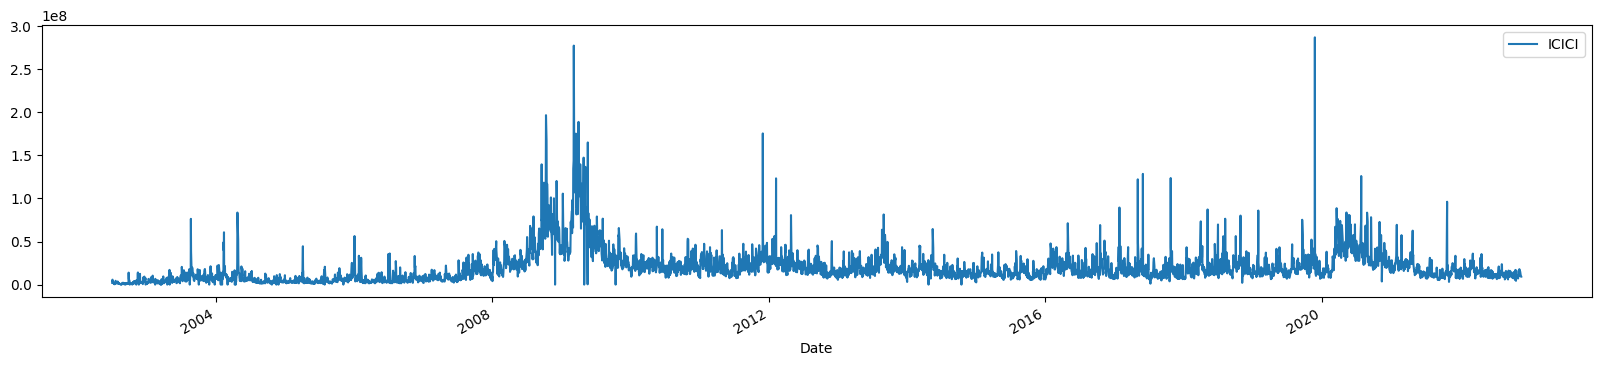

In [37]:
ICICI['Volume'].plot(legend = True, figsize = (20,4), label="ICICI")

<AxesSubplot: xlabel='Date'>

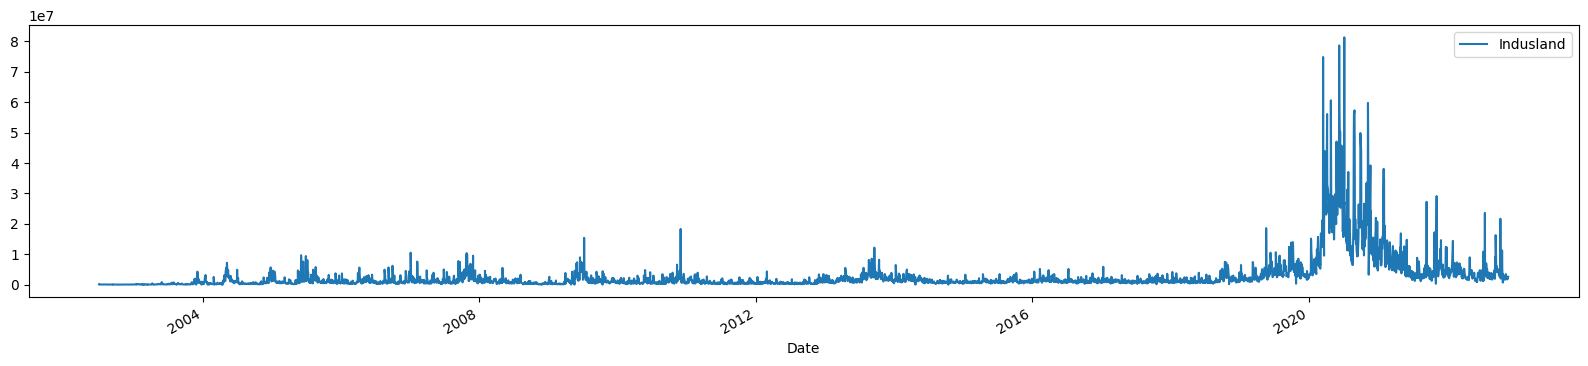

In [38]:
INDUS['Volume'].plot(legend = True, figsize = (20,4), label="Indusland")

## 1.  Moving Averages

# 1.1    Moving Averages for Axis Bank

In [39]:
# 1.1.1  Calculating the Simple Moving Average of Axis Bank Stock;
"""A SMA tells us the unweighted mean of the previous K data points,
The more the value of K the more smooth is the curve, but increasing K decreases accuracy.
If the data points are p1,  p2, . . . , pn then we calculate the simple moving average."""

'A SMA tells us the unweighted mean of the previous K data points,\nThe more the value of K the more smooth is the curve, but increasing K decreases accuracy.\nIf the data points are p1,  p2, . . . , pn then we calculate the simple moving average.'

In [40]:
AXIS_SMA = AXIS['Close'].to_frame()
AXIS_SMA['SMA30'] = AXIS['Close'].rolling(30).mean()
AXIS_SMA.dropna(inplace=True)
AXIS_SMA

,Close,SMA30
Date,,
2002-08-09,7.040000,7.509333
2002-08-12,6.990000,7.486333
2002-08-13,7.000000,7.464667
2002-08-14,7.010000,7.439333
2002-08-15,7.010000,7.414667
...,...,...
2022-11-15,858.650024,834.146665
2022-11-16,855.400024,838.219999
2022-11-17,858.200012,842.735000


<AxesSubplot: xlabel='Date'>

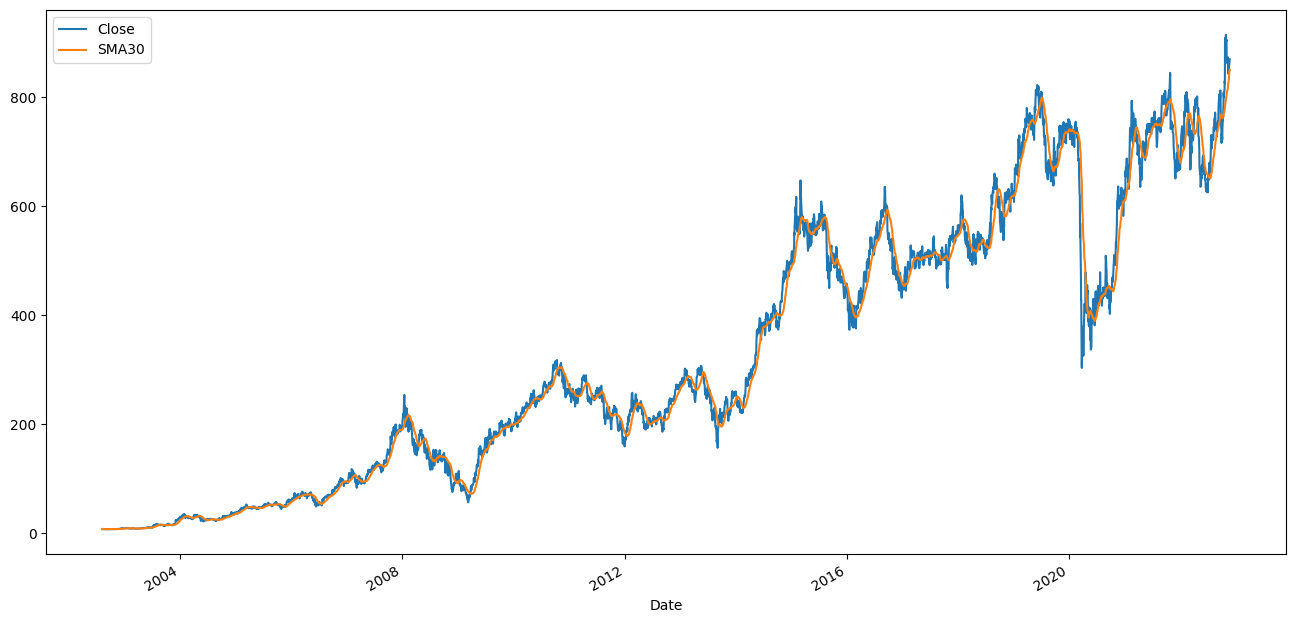

In [41]:
AXIS_SMA[['Close','SMA30']].plot(label='Axis Bank',
                                figsize=(16,8))

In [42]:
# 1.1.2  Calculating the Cumulative Moving Average of Axis Bank Stock;
"""
CMA is the mean of all the previous values up to the current value.
CMA of dataPoints x1, x2 …..  at time t can be calculated as,
the summation of all x's divided by time t
"""

"\nCMA is the mean of all the previous values up to the current value.\nCMA of dataPoints x1, x2 …..  at time t can be calculated as,\nthe summation of all x's divided by time t\n"

In [43]:
AXIS_CMA = AXIS['Close'].to_frame()
AXIS_CMA['CMA30'] = AXIS['Close'].expanding().mean()
AXIS_CMA

,Close,CMA30
Date,,
2002-07-01,7.680000,7.680000
2002-07-02,7.650000,7.665000
2002-07-03,7.770000,7.700000
2002-07-04,7.750000,7.712500
2002-07-05,7.760000,7.722000
...,...,...
2022-11-15,858.650024,323.273422
2022-11-16,855.400024,323.378523
2022-11-17,858.200012,323.484135


<AxesSubplot: xlabel='Date'>

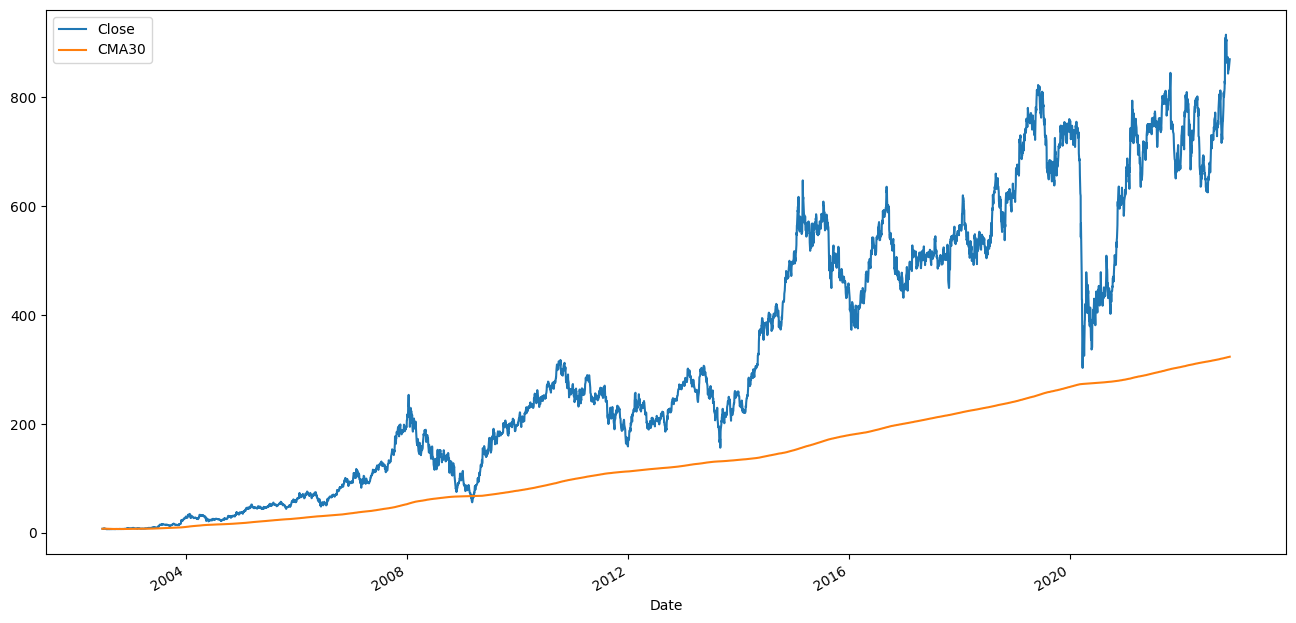

In [44]:
AXIS_CMA[['Close','CMA30']].plot(label='Axis Bank',
                                 figsize=(16,8))

In [45]:
# 1.1.3  Calculating Exponential Moving Average of Axis Bank Stocks;
"""
EMA tells us the weighted mean of the previous K data points.
EMA places a greater weight and significance on the most recent data points.
"""

'\nEMA tells us the weighted mean of the previous K data points.\nEMA places a greater weight and significance on the most recent data points.\n'

In [46]:
AXIS_EMA = AXIS['Close'].to_frame()
AXIS_EMA['EWMA30'] = AXIS['Close'].ewm(span=30).mean()
AXIS_EMA

,Close,EWMA30
Date,,
2002-07-01,7.680000,7.680000
2002-07-02,7.650000,7.664500
2002-07-03,7.770000,7.702036
2002-07-04,7.750000,7.715252
2002-07-05,7.760000,7.725433
...,...,...
2022-11-15,858.650024,840.331894
2022-11-16,855.400024,841.304032
2022-11-17,858.200012,842.394095


<AxesSubplot: xlabel='Date'>

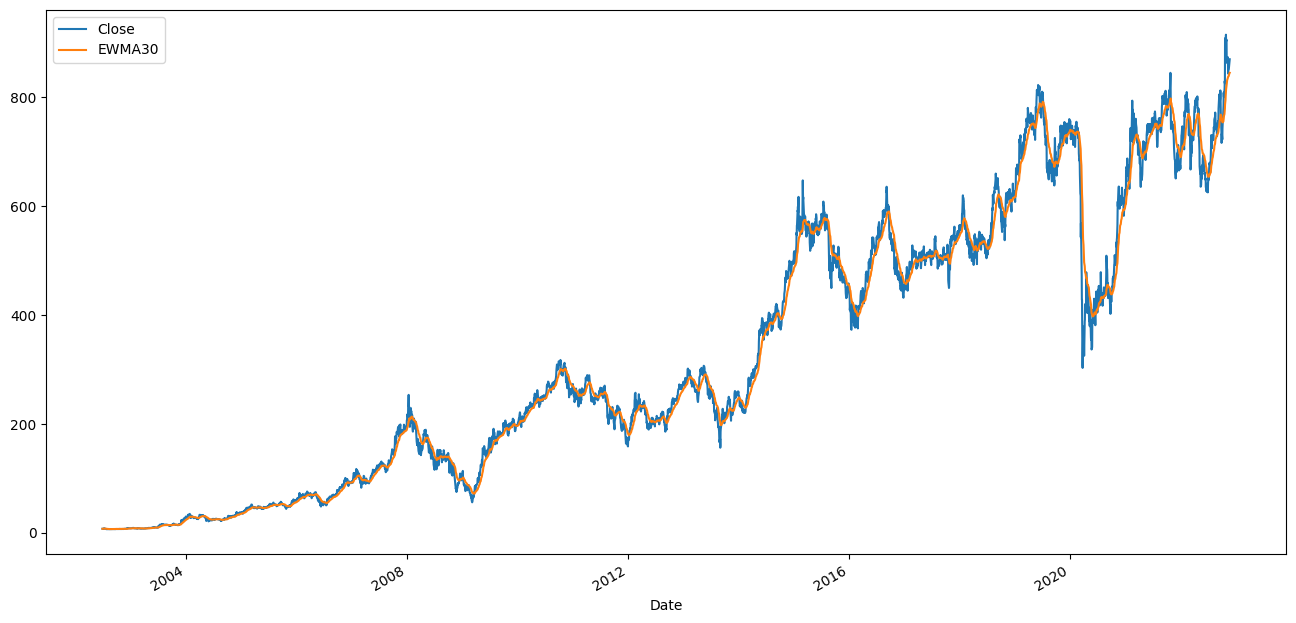

In [47]:
AXIS_EMA[['Close','EWMA30']].plot(label='Axis Bank',
                                  figsize=(16,8))

#  1.2  Moving Averages for HDFC Bank

In [48]:
#  1.2.1  Calculating the Simple Moving Average of HDFC Bank Stock;
HDFC_SMA = HDFC['Close'].to_frame()
HDFC_SMA['SMA30'] = HDFC['Close'].rolling(30).mean()
HDFC_SMA.dropna(inplace=True)
HDFC_SMA

,Close,SMA30
Date,,
2002-08-09,21.000000,21.128000
2002-08-12,20.980000,21.121333
2002-08-13,21.150000,21.127500
2002-08-14,20.830000,21.122333
2002-08-15,20.830000,21.092167
...,...,...
2022-11-15,1619.000000,1473.028341
2022-11-16,1632.900024,1480.080009
2022-11-17,1618.150024,1486.911678


<AxesSubplot: xlabel='Date'>

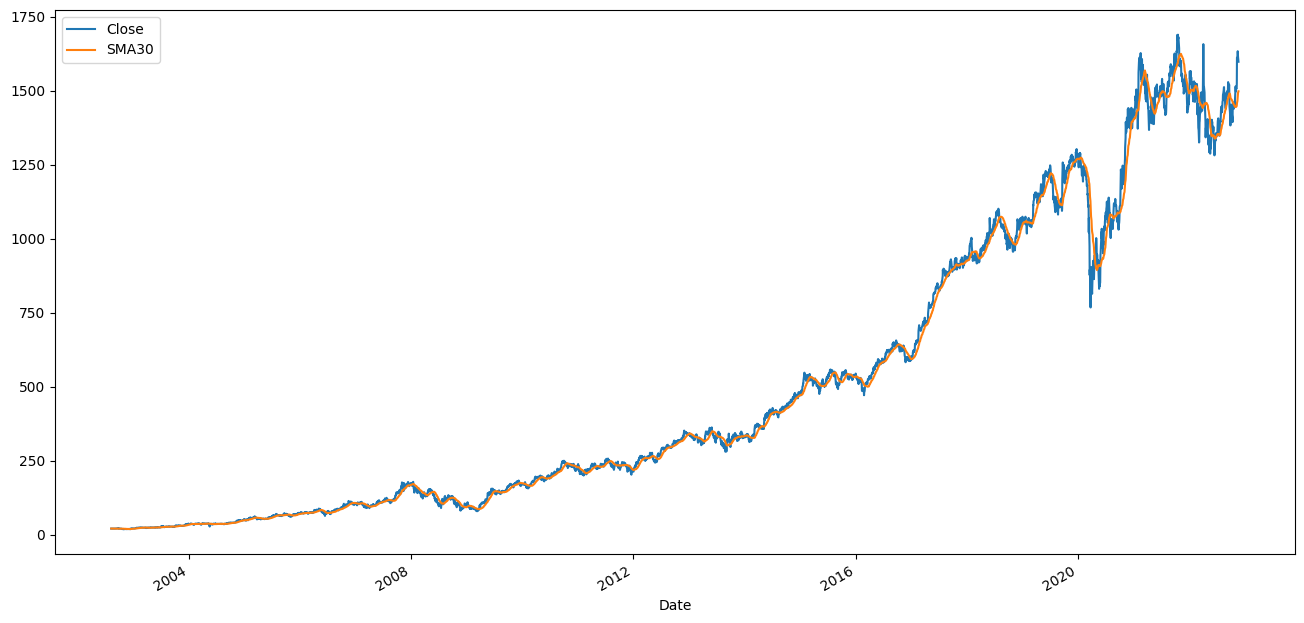

In [49]:
HDFC_SMA[['Close','SMA30']].plot(label='HDFC Bank',
                                figsize=(16,8))

In [50]:
# 1.2.2  Calculating the Cumulative Moving Average of HDFC Bank Stock;
HDFC_CMA = HDFC['Close'].to_frame()
HDFC_CMA['CMA30'] = HDFC['Close'].expanding().mean()
HDFC_CMA

,Close,CMA30
Date,,
2002-07-01,21.180000,21.180000
2002-07-02,20.965000,21.072500
2002-07-03,20.985001,21.043334
2002-07-04,21.735001,21.216250
2002-07-05,21.340000,21.241000
...,...,...
2022-11-15,1619.000000,488.722568
2022-11-16,1632.900024,488.948422
2022-11-17,1618.150024,489.171276


<AxesSubplot: xlabel='Date'>

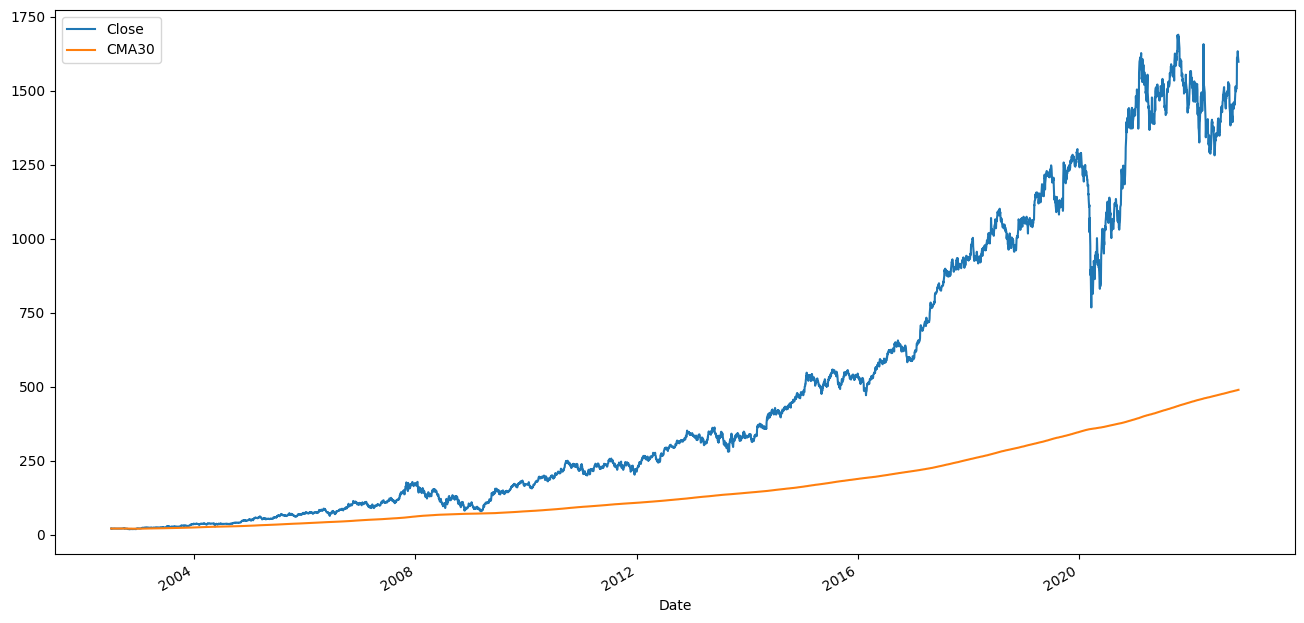

In [51]:
HDFC_CMA[['Close','CMA30']].plot(label='HDFC Bank',
                                 figsize=(16,8))

In [52]:
# 1.2.3  Calculating Exponential Moving Average of HDFC Bank Stocks;
HDFC_EMA = HDFC['Close'].to_frame()
HDFC_EMA['EWMA30'] = HDFC['Close'].ewm(span=30).mean()
HDFC_EMA

,Close,EWMA30
Date,,
2002-07-01,21.180000,21.180000
2002-07-02,20.965000,21.068917
2002-07-03,20.985001,21.039060
2002-07-04,21.735001,21.230817
2002-07-05,21.340000,21.255659
...,...,...
2022-11-15,1619.000000,1498.302802
2022-11-16,1632.900024,1506.986493
2022-11-17,1618.150024,1514.158334


<AxesSubplot: xlabel='Date'>

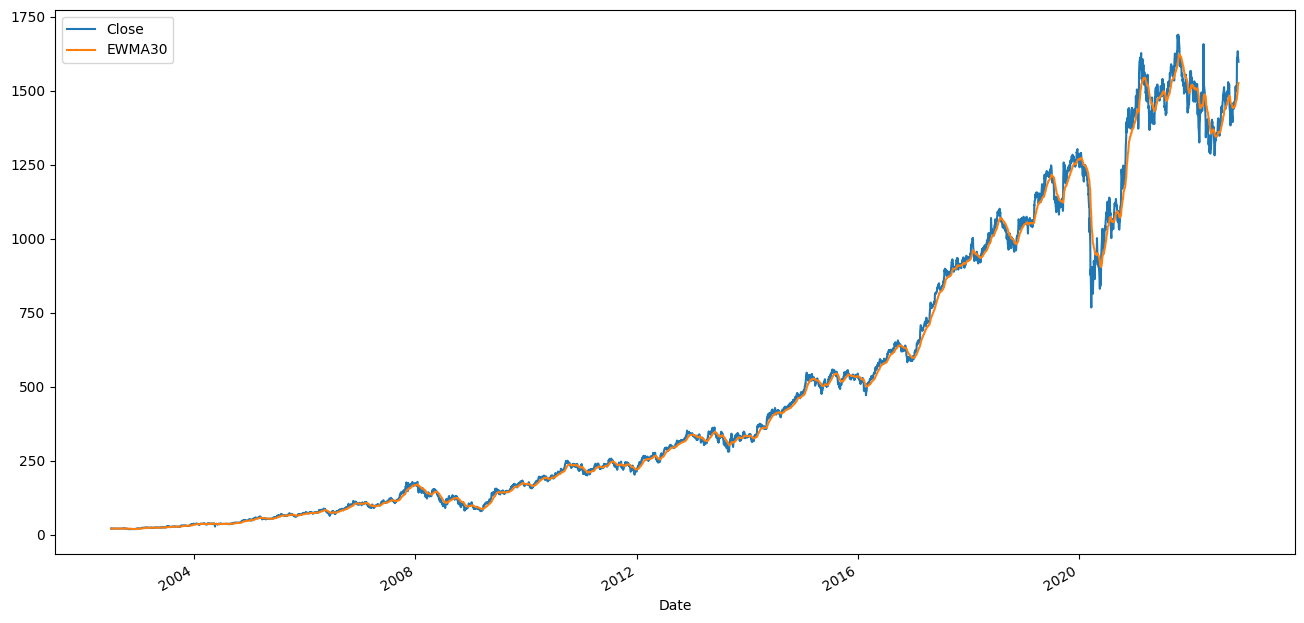

In [53]:
HDFC_EMA[['Close','EWMA30']].plot(label='HDFC Bank',
                                  figsize=(16,8))

#  1.3  Moving Averages for ICICI Bank

In [54]:
#  1.3.1  Calculating the Simple Moving Average of ICICI Bank Stock;
ICICI_SMA = ICICI['Close'].to_frame()
ICICI_SMA['SMA30'] = ICICI['Close'].rolling(30).mean()
ICICI_SMA.dropna(inplace=True)
ICICI_SMA

,Close,SMA30
Date,,
2002-08-09,24.663635,26.088181
2002-08-12,24.427273,26.064848
2002-08-13,24.418180,25.987272
2002-08-14,24.054544,25.852727
2002-08-15,24.054544,25.741515
...,...,...
2022-11-15,911.700012,894.400000
2022-11-16,913.599976,896.119999
2022-11-17,919.799988,898.501666


<AxesSubplot: xlabel='Date'>

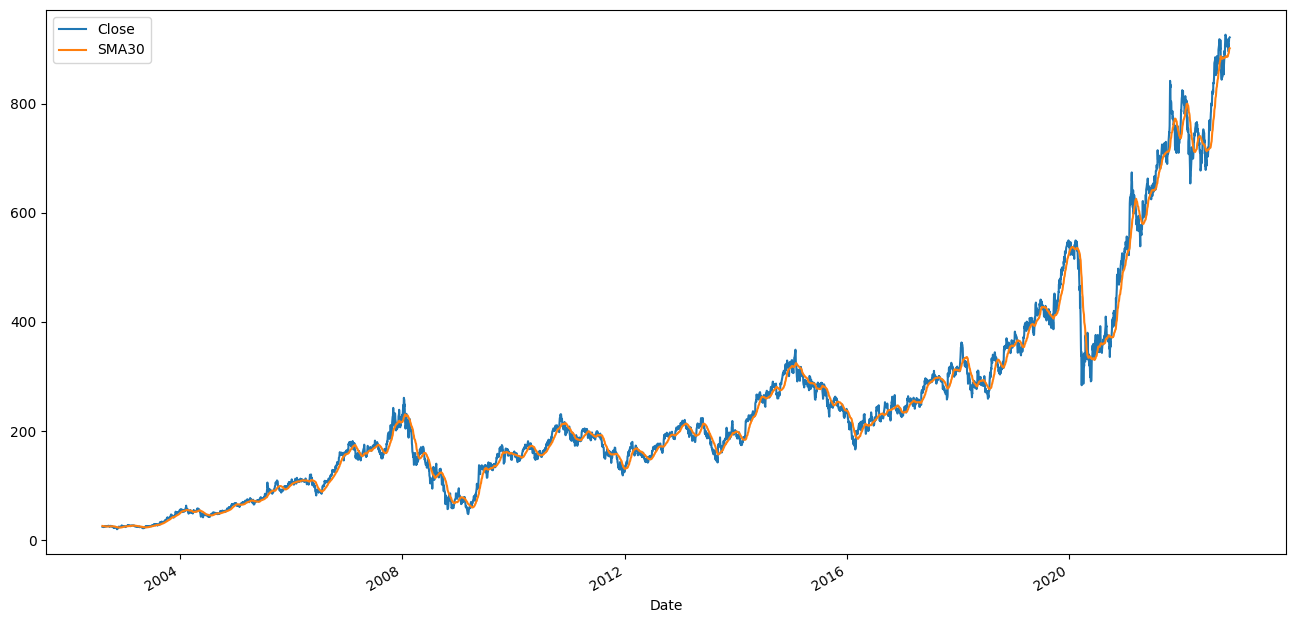

In [55]:
ICICI_SMA[['Close','SMA30']].plot(label='ICICI Bank',
                                figsize=(16,8))

In [56]:
# 1.3.2  Calculating the Cumulative Moving Average of ICICI Bank Stock;
ICICI_CMA = ICICI['Close'].to_frame()
ICICI_CMA['CMA30'] = ICICI['Close'].expanding().mean()
ICICI_CMA

,Close,CMA30
Date,,
2002-07-01,25.127272,25.127272
2002-07-02,26.745455,25.936363
2002-07-03,28.090908,26.654545
2002-07-04,27.390909,26.838636
2002-07-05,27.672728,27.005454
...,...,...
2022-11-15,911.700012,242.778805
2022-11-16,913.599976,242.911299
2022-11-17,919.799988,243.044966


<AxesSubplot: xlabel='Date'>

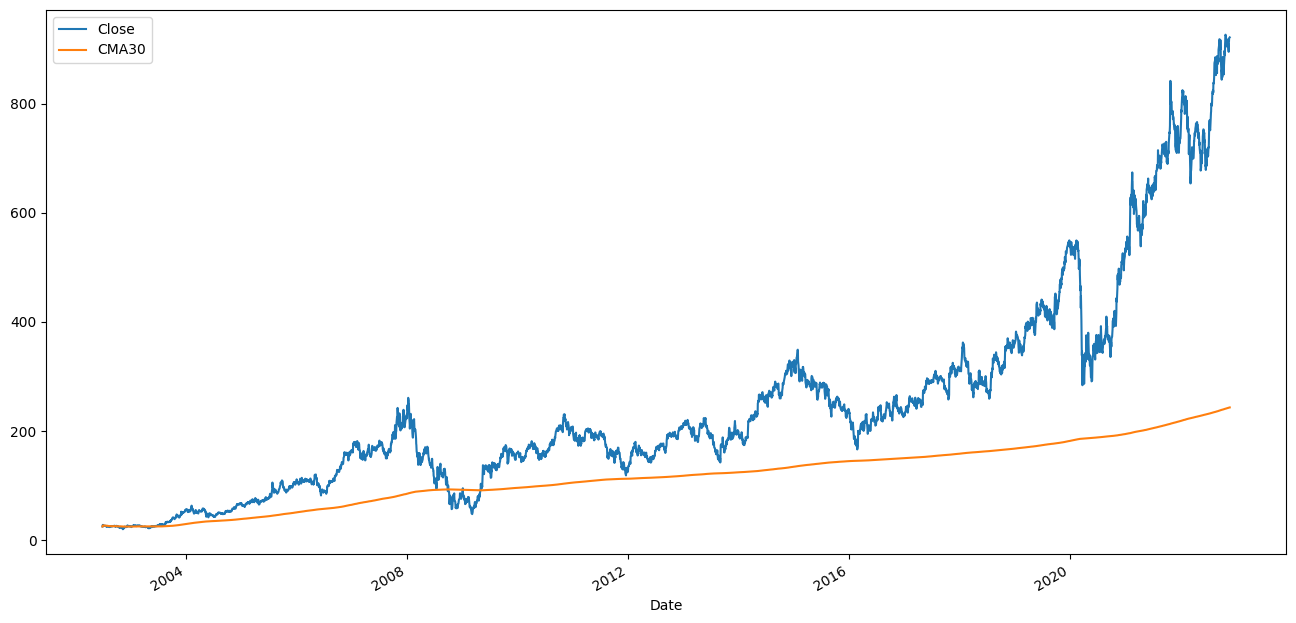

In [57]:
ICICI_CMA[['Close','CMA30']].plot(label='ICICI Bank',
                                 figsize=(16,8))

In [58]:
# 1.3.3  Calculating Exponential Moving Average of ICICI Bank Stocks;
ICICI_EMA = ICICI['Close'].to_frame()
ICICI_EMA['EWMA30'] = ICICI['Close'].ewm(span=30).mean()
ICICI_EMA

,Close,EWMA30
Date,,
2002-07-01,25.127272,25.127272
2002-07-02,26.745455,25.963333
2002-07-03,28.090908,26.720312
2002-07-04,27.390909,26.905086
2002-07-05,27.672728,27.079743
...,...,...
2022-11-15,911.700012,898.216466
2022-11-16,913.599976,899.208951
2022-11-17,919.799988,900.537405


<AxesSubplot: xlabel='Date'>

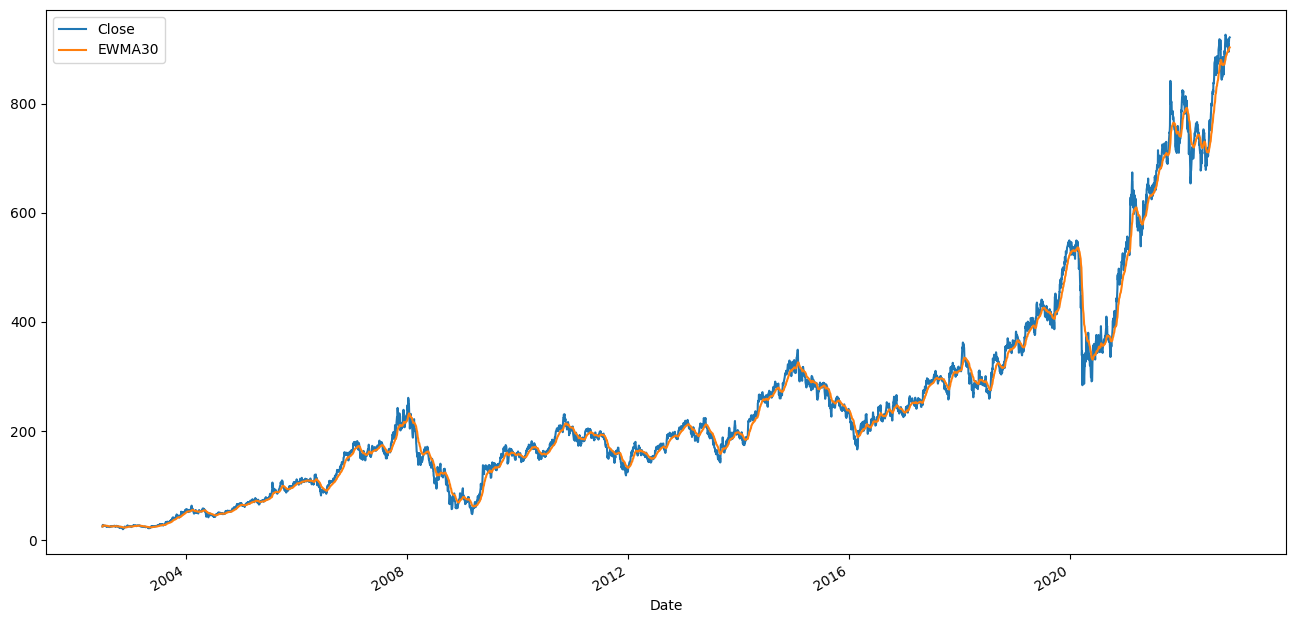

In [59]:
ICICI_EMA[['Close','EWMA30']].plot(label='ICICI Bank',
                                  figsize=(16,8))

#  1.4  Moving Averages for Indusland Bank

In [60]:
#  1.4.1  Calculating the Simple Moving Average of Indusland Bank Stock;
INDUS_SMA = INDUS['Close'].to_frame()
INDUS_SMA['SMA30'] = INDUS['Close'].rolling(30).mean()
INDUS_SMA.dropna(inplace=True)
INDUS_SMA

,Close,SMA30
Date,,
2002-08-09,15.950000,16.978333
2002-08-12,16.150000,16.896667
2002-08-13,16.000000,16.808333
2002-08-14,16.200001,16.750000
2002-08-15,16.200001,16.690000
...,...,...
2022-11-15,1152.849976,1167.336662
2022-11-16,1144.099976,1165.966663
2022-11-17,1146.500000,1165.641663


<AxesSubplot: xlabel='Date'>

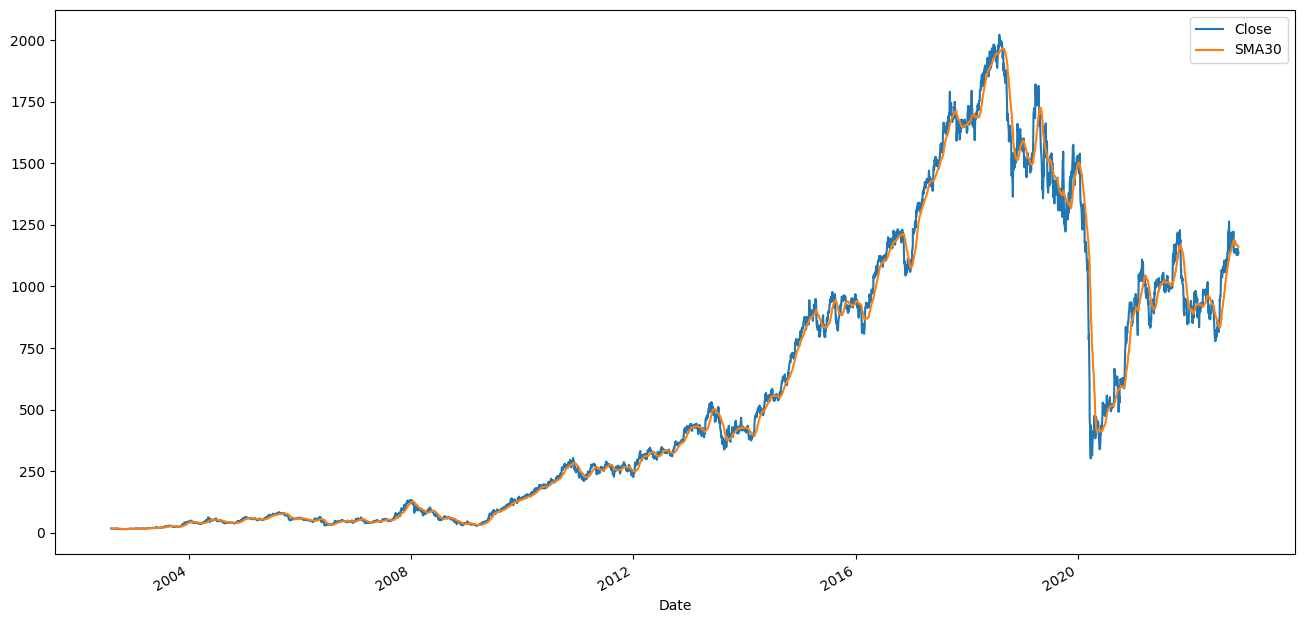

In [61]:
INDUS_SMA[['Close','SMA30']].plot(label='Indusland Bank',
                                figsize=(16,8))

In [62]:
# 1.4.2  Calculating the Cumulative Moving Average of Indusland Bank Stock;
INDUS_CMA = INDUS['Close'].to_frame()
INDUS_CMA['CMA30'] = INDUS['Close'].expanding().mean()
INDUS_CMA

,Close,CMA30
Date,,
2002-07-01,18.600000,18.600000
2002-07-02,18.650000,18.625000
2002-07-03,17.950001,18.400000
2002-07-04,18.000000,18.300000
2002-07-05,18.100000,18.260000
...,...,...
2022-11-15,1152.849976,559.938570
2022-11-16,1144.099976,560.054063
2022-11-17,1146.500000,560.169984


<AxesSubplot: xlabel='Date'>

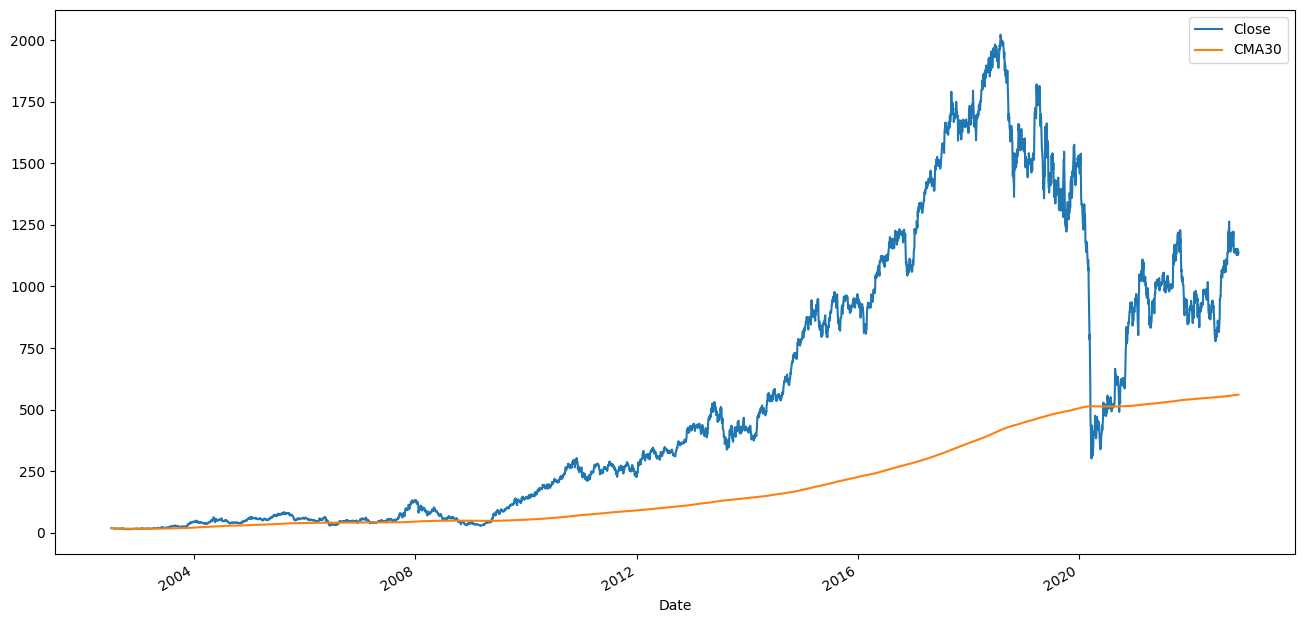

In [63]:
INDUS_CMA[['Close','CMA30']].plot(label='Indusland Bank',
                                 figsize=(16,8))

In [64]:
# 1.4.3  Calculating Exponential Moving Average of Indusland Bank Stocks;
INDUS_EMA = INDUS['Close'].to_frame()
INDUS_EMA['EWMA30'] = INDUS['Close'].ewm(span=30).mean()
INDUS_EMA

,Close,EWMA30
Date,,
2002-07-01,18.600000,18.600000
2002-07-02,18.650000,18.625833
2002-07-03,17.950001,18.385376
2002-07-04,18.000000,18.279191
2002-07-05,18.100000,18.238421
...,...,...
2022-11-15,1152.849976,1153.898307
2022-11-16,1144.099976,1153.266157
2022-11-17,1146.500000,1152.829631


<AxesSubplot: xlabel='Date'>

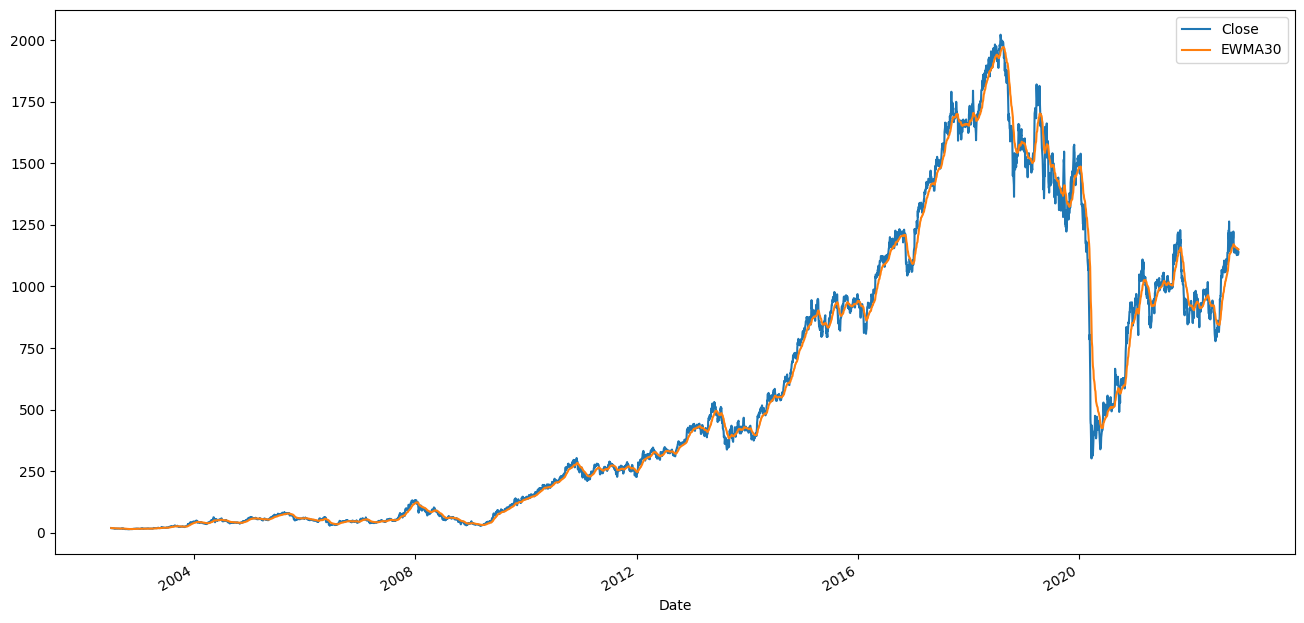

In [65]:
INDUS_EMA[['Close','EWMA30']].plot(label='Indusland Bank',
                                  figsize=(16,8))

## 2.  Weekly Returns

# 2.1   Calculating Weekly Returns of Axis Bank

<AxesSubplot: xlabel='Date'>

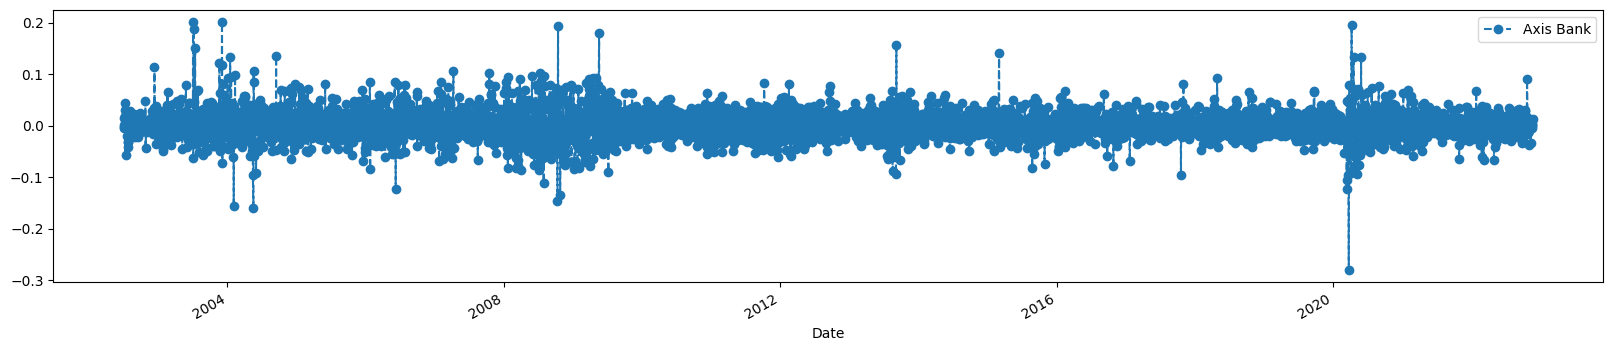

In [66]:
AXIS['Weekly Return']=AXIS['Adj Close'].pct_change()
AXIS['Weekly Return'].plot(figsize=(20,4), legend=True, linestyle='--', marker='o', label="Axis Bank")

# 2.1.1 Overall look at the Average Weekly Returns of Axis Bank

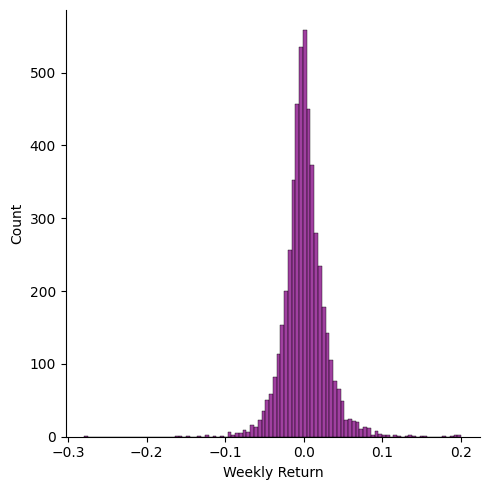

In [67]:
sns.displot(AXIS['Weekly Return'].dropna(), bins=100, color = 'purple')

# 2.2  Calculating Weekly Returns of HDFC Bank

<AxesSubplot: xlabel='Date'>

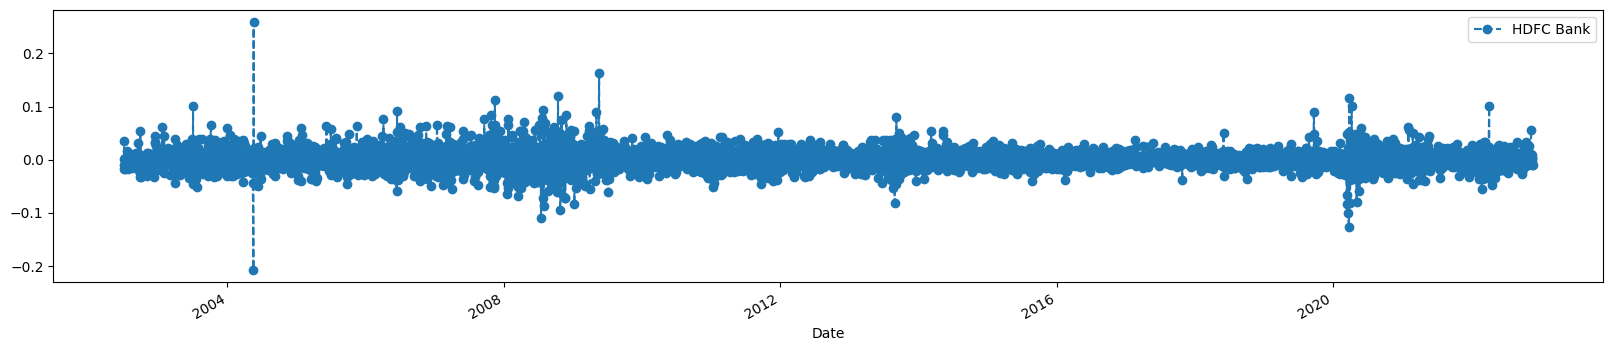

In [68]:
HDFC['Weekly Return']=HDFC['Adj Close'].pct_change()
HDFC['Weekly Return'].plot(figsize=(20,4), legend=True, linestyle='--', marker='o', label="HDFC Bank")

# 2.2.1 Overall look at the Average Weekly Returns of HDFC Bank

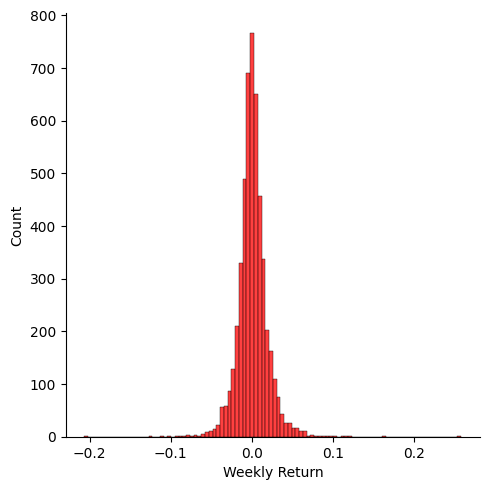

In [69]:
sns.displot(HDFC['Weekly Return'].dropna(), bins=100, color = 'red')

# 2.3  Calculating Weekly Returns of ICICI Bank

<AxesSubplot: xlabel='Date'>

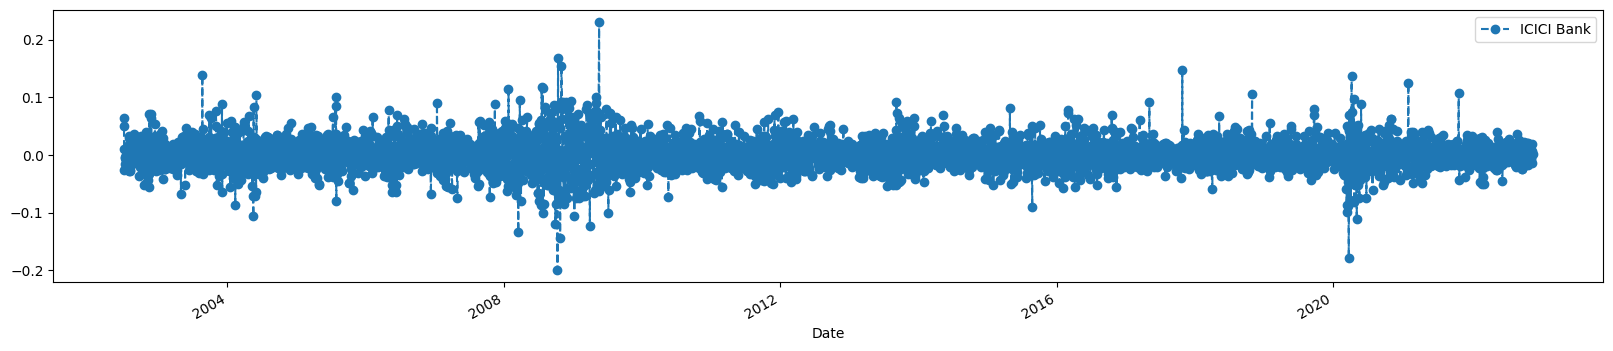

In [70]:
ICICI['Weekly Return']=ICICI['Adj Close'].pct_change()
ICICI['Weekly Return'].plot(figsize=(20,4), legend=True, linestyle='--', marker='o', label="ICICI Bank")

# 2.3.1 Overall look at the Average Weekly Returns of ICICI Bank

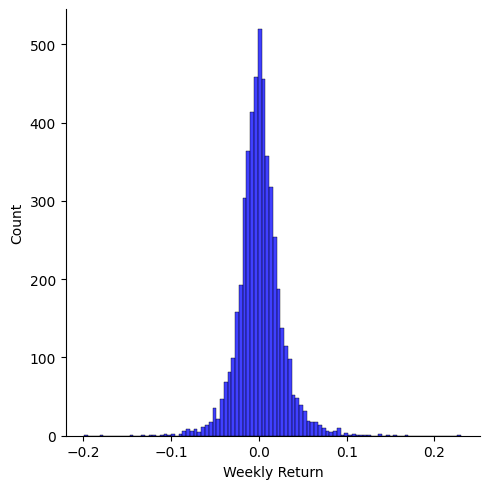

In [71]:
sns.displot(ICICI['Weekly Return'].dropna(), bins=100, color = 'blue')

# 2.4 Calculating Weekly Returns of Indusind Bank

<AxesSubplot: xlabel='Date'>

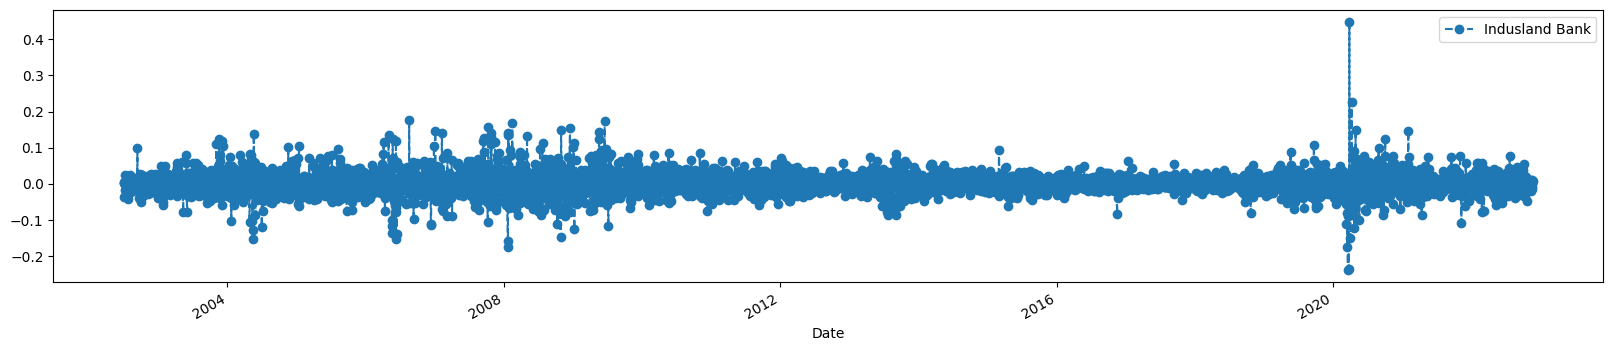

In [72]:
INDUS['Weekly Return']=INDUS['Adj Close'].pct_change()
INDUS['Weekly Return'].plot(figsize=(20,4), legend=True, linestyle='--', marker='o', label="Indusland Bank")

# 2.4.1 Overall look at the Average Weekly Returns of Indusland Bank

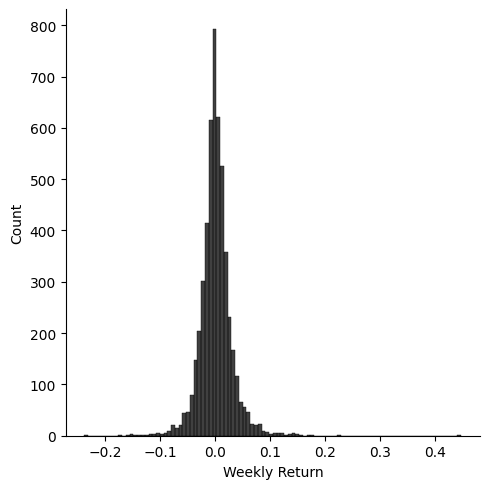

In [73]:
sns.displot(INDUS['Weekly Return'].dropna(), bins=100, color = 'black')

# Volume of all the Stocks

In [74]:
AXIS_VOL = AXIS['Volume']
HDFC_VOL = HDFC['Volume']
ICICI_VOL = ICICI['Volume']
INDUS_VOL = INDUS['Volume']

In [75]:
Volume_df = pd.concat([AXIS_VOL, HDFC_VOL, ICICI_VOL, INDUS_VOL],axis=1)

In [76]:
print(Volume_df)

               Volume     Volume      Volume     Volume
Date                                                   
2002-07-01   290210.0  1737470.0   2047540.0    84409.0
2002-07-02   226820.0   911400.0   5546354.0    34616.0
2002-07-03   149540.0   382260.0   5745267.0    89445.0
2002-07-04   182560.0  1154400.0   3896601.0    58765.0
2002-07-05   359170.0   466380.0   3261038.0    30847.0
...               ...        ...         ...        ...
2022-11-15  7124767.0  5515101.0  15176911.0  1802234.0
2022-11-16  6521854.0  6789075.0  13008311.0  2331206.0
2022-11-17  4909607.0  6050465.0  12584194.0  1721557.0
2022-11-18  7065304.0  5229616.0  10874061.0  2082130.0
2022-11-21  7209207.0  4172408.0   9245704.0  2602264.0

[5069 rows x 4 columns]


# Returns of all the Stocks

In [77]:
AXIS_ADJC = AXIS['Adj Close']
HDFC_ADJC = HDFC['Adj Close']
ICICI_ADJC = ICICI['Adj Close']
INDUS_ADJC = INDUS['Adj Close']

In [78]:
closing_df = pd.concat([AXIS_ADJC, HDFC_ADJC, ICICI_ADJC, INDUS_ADJC],axis=1)

In [79]:
# Renaming the columns

In [80]:
closing_df.columns.values[0] = "Axis_Bank"
closing_df.columns.values[1] = "HDFC_Bank"
closing_df.columns.values[2] = "ICICI_Bank"
closing_df.columns.values[3] = "Indusland_Bank"

In [81]:
print(closing_df)


             Axis_Bank    HDFC_Bank  ICICI_Bank  Indusland_Bank
Date                                                           
2002-07-01    6.232168    18.305027   18.183353       13.616019
2002-07-02    6.207823    18.119209   19.354351       13.652622
2002-07-03    6.305201    18.136497   20.327982       13.140193
2002-07-04    6.288971    18.784689   19.821436       13.176793
2002-07-05    6.297086    18.443310   20.025372       13.249998
...                ...          ...         ...             ...
2022-11-15  858.650024  1619.000000  911.700012     1152.849976
2022-11-16  855.400024  1632.900024  913.599976     1144.099976
2022-11-17  858.200012  1618.150024  919.799988     1146.500000
2022-11-18  859.200012  1613.900024  920.349976     1128.650024
2022-11-21  870.049988  1597.349976  921.400024     1139.000000

[5069 rows x 4 columns]


# New DataFrame for storing stock weekly return

In [82]:
bank_rets = closing_df.pct_change()
bank_rets.dropna()

,Axis_Bank,HDFC_Bank,ICICI_Bank,Indusland_Bank
Date,,,,
2002-07-02,-0.003906,-0.010151,0.064399,0.002688
2002-07-03,0.015686,0.000954,0.050306,-0.037533
2002-07-04,-0.002574,0.035740,-0.024919,0.002785
2002-07-05,0.001290,-0.018173,0.010289,0.005556
2002-07-08,0.018041,-0.017338,-0.015440,0.024862
...,...,...,...,...
2022-11-15,0.008989,0.002446,0.018716,-0.000087
2022-11-16,-0.003785,0.008586,0.002084,-0.007590
2022-11-17,0.003273,-0.009033,0.006786,0.002098


In [83]:
# Using joinplot to compare the weekly returns of Axis Bank and HDFC
# Comparing Axis Bank and HDFC

<AxesSubplot: xlabel='Axis_Bank', ylabel='HDFC_Bank'>

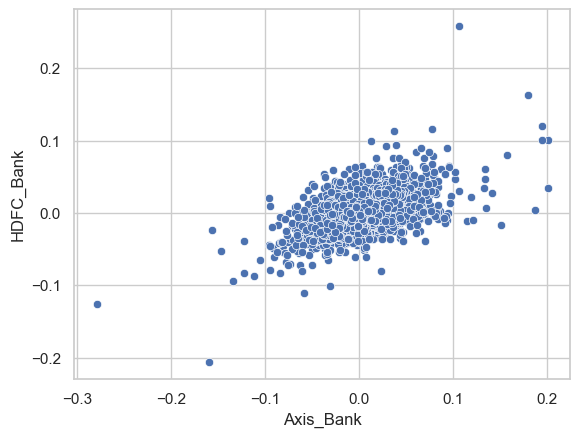

In [84]:
sns.set(style='whitegrid')
 
sns.scatterplot(x="Axis_Bank",
                    y="HDFC_Bank",
                    data=bank_rets)

In [85]:
# Comparing Axis Bank and Indusland Bank

<AxesSubplot: xlabel='Axis_Bank', ylabel='Indusland_Bank'>

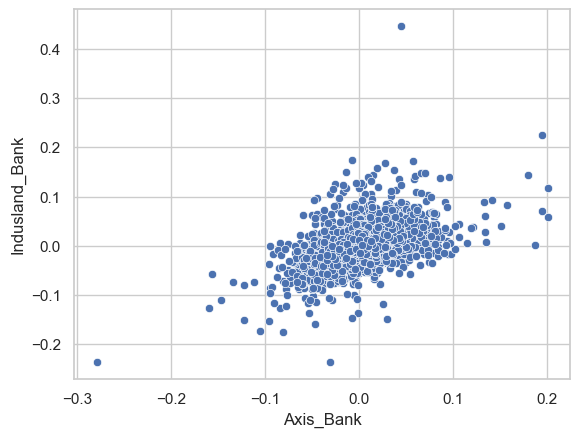

In [86]:
sns.set(style='whitegrid')
 
sns.scatterplot(x="Axis_Bank",
                    y="Indusland_Bank",
                    data=bank_rets)

# Automatic visual analysis of all the comparisons

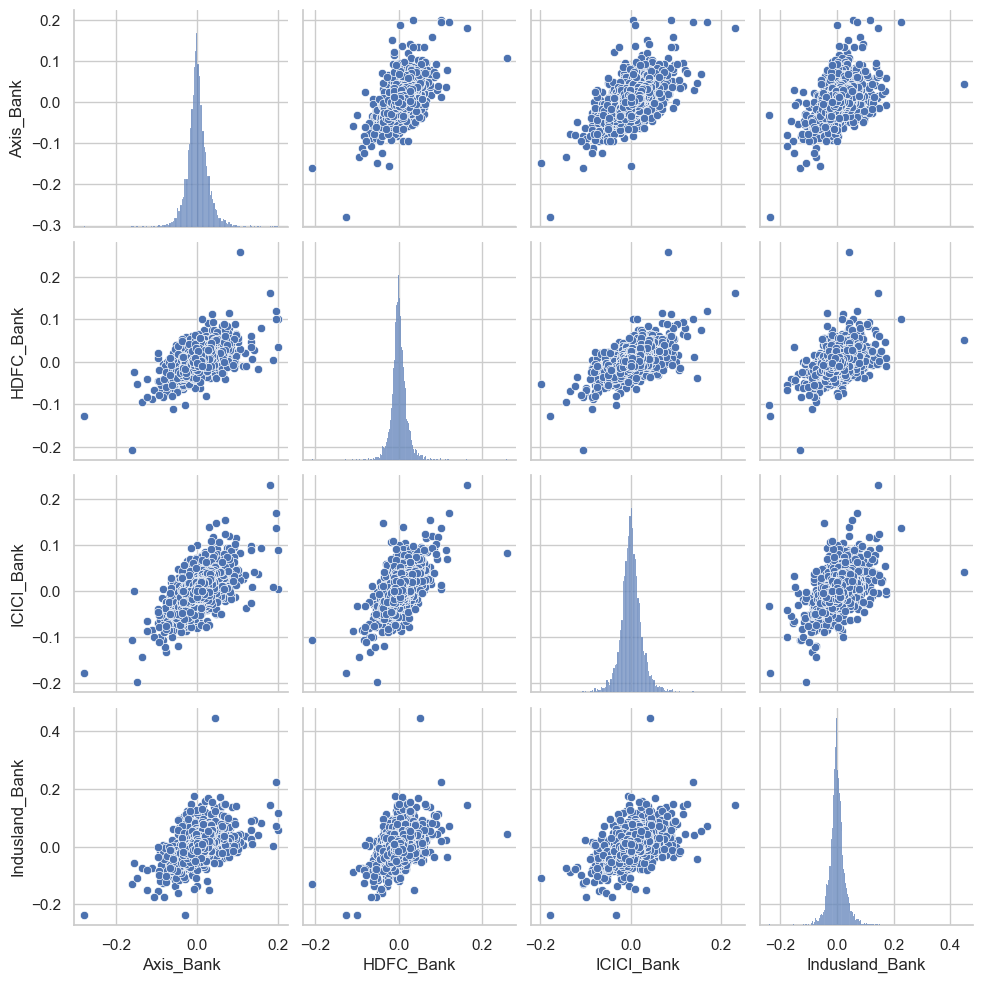

In [87]:
sns.pairplot(bank_rets.dropna())

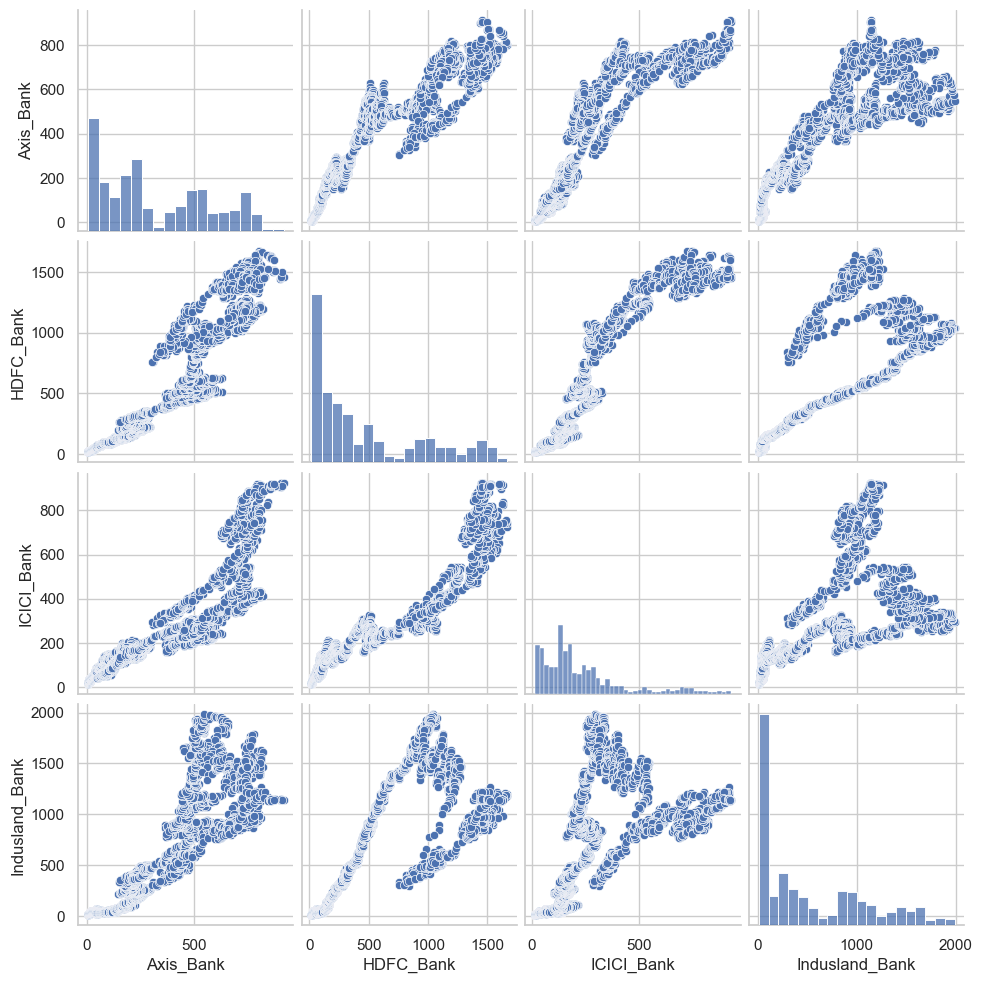

In [88]:
sns.pairplot(closing_df.dropna())

# HEATMAP

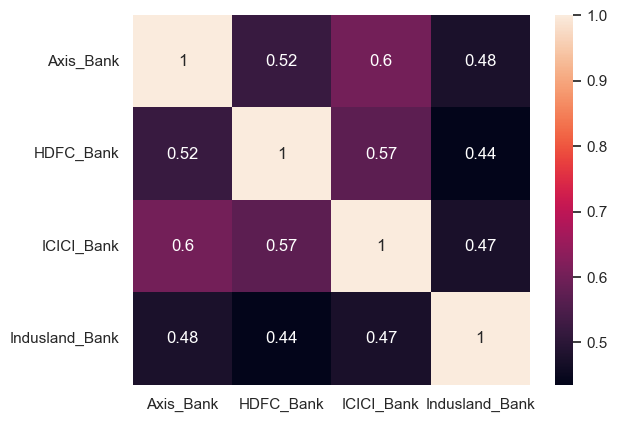

In [89]:
corr_plot_rets = sns.heatmap(bank_rets.corr(),annot=True)

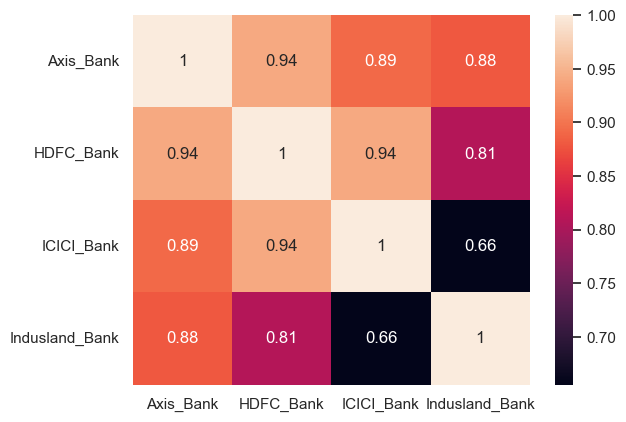

In [90]:
corr_plot_cl = sns.heatmap(closing_df.corr(),annot=True)

# HEATMAP excluding all the Null values

<AxesSubplot: ylabel='Date'>

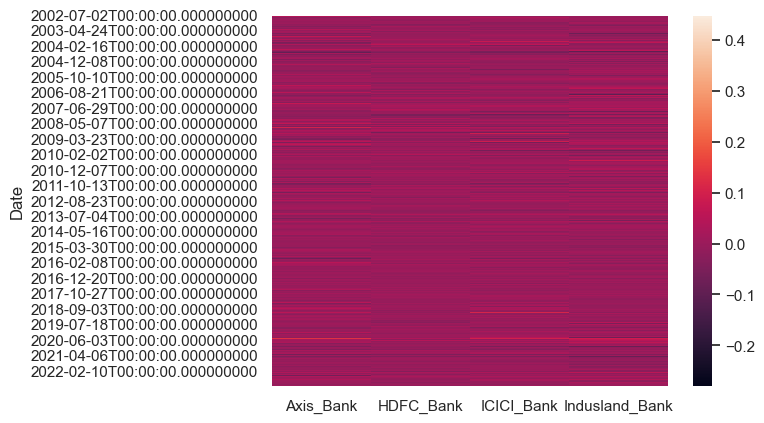

In [91]:
sns.heatmap(bank_rets.dropna())